# Classification Model 1: KNN

***
## Loading Dataset


In [1]:
# Import necessary Python libraries here ...
# ...
# ...


### Data Preparation

In [2]:
# Loading the dataset from the /data folder here 
data_path  = ?

# Read your csv file here ...
currentdf  = ???

# Allocate your training data and label 
x = ?
y = ?

# Splitting dataset into 75% for training and 25% for testing here ...
# ...
# ...

# Display the features and label from the training set 
print(?)
print(?)

# Insert code to standardize your dataset here ...
# ...
# ...


     index_col       avC         avP       sdC         sdP          avR  maxC  \
432          3  3.595600  792.930000  3.332669  786.913383   399.232039  7.23   
22           9  1.616815  329.370370  2.485054  583.668067   637.157143  1.76   
620         14  1.305465  254.702326  2.232888  529.072646   604.123431  0.66   
963          0  0.284667   34.533333  0.227744   33.000244  1429.358887  0.77   
188          9  1.484593  298.003704  2.357156  558.706609   623.840883  1.84   
..         ...       ...         ...       ...         ...          ...   ...   
360         21  0.906095  167.071429  1.721403  405.103331   871.333092  0.09   
466         15  1.292000  256.215556  2.277856  534.821437   658.162380  1.30   
299          0  2.612000  574.333333  3.216506  759.213038   753.064179  7.25   
493         20  1.080317  202.135000  1.919027  450.266332   678.029294  2.49   
527          9  1.641481  339.711111  2.584596  619.005346   585.429776  0.59   

     maxP     stdCR       s

## Building a KNN Model

Let's train a model using the selected features extracted earlier.

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_scores, test_scores = list(), list()

# define the tree depths to evaluate later 
values = [i for i in range(0, 10)]
mdepth=[3, 5, 7, 9, 10, 11, 12, 13, 15, 17]

for i in values:
    knn = KNeighborsClassifier(n_neighbors=mdepth[i])
    knn.fit(X_train_sc, y_train)
    
    # Predicting on the train dataset
    y_pred_train = knn.predict(X_train_sc)   
    train_acc = accuracy_score(y_train, y_pred_train)
    train_scores.append(train_acc)
    
    # Predicting on the test dataset
    y_pred_test = knn.predict(X_test_sc)    
    test_acc = accuracy_score(y_test, y_pred_test)
    test_scores.append(test_acc)
    

The model has been trained using all the features we have in X_train. 

After we have trained our first predictive model, we compute the first performance metric - Accuracy to evaluate our KNN model. Accuracy is defined as the proportion (or percentage) of predictions that are correct. Let's plot and compare the accuracy of the trained and test dataset for 10 iterations.

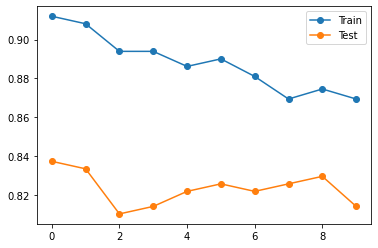

In [4]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()

# Insert code to display your plot here ...
plt.show()


We get an accuracy of between 0.87 to 0.91 (or between 87% - 91%) of the predictions made in the training set are correct. Let's think about it. Is this accurancy acceptable for you?

Your response here ...



In [5]:
# From the plot above, build a new KNN model from the K value that produced the best test accuracy result ...

train_scores, test_scores = list(), list()

knn = KNeighborsClassifier(n_neighbors=??) 
knn.fit(??, ??)
    
# Predicting on the train dataset
y_pred_train = knn.predict(??)   
train_acc = accuracy_score(??, ??)
    
# Predicting on the test dataset
y_pred_test = knn.predict(??)    
test_acc = accuracy_score(??, ??)

print("Training Accuracy: " + str(train_acc))
print("Test Accuracy: " + str(test_acc))


Training Accuracy: 0.9120310478654593
Test Accuracy: 0.8372093023255814


## Model Evaluation

### Confusion Matrix

A confusion matrix is a table with 4 different cases that represent the 4 possible outcomes in a binary classification problem. The model makes a correct prediction have 2 possible cases: 

- True Positive (TP): The model predicts the positive class and the observation actually belongs to the positive class. In this problem, the model predicts default and the customer actually defaults in his/her credit card payment. 

- True Negative (TN): The model predicts the negative class and the observation actually belongs to the negative class. In this problem, the model predicts customer will pay his/her credit card bill (non default) and he/she actually makes the next payment.

On the other hand, when the model makes a mistake, again 2 possible cases can be happening: 

- False Positive (FP): The model predicts the positive class and the observation actually belongs to the negative class. In the problem, the model predicts default and the customer actually makes his/her payment. 

- False Negative (FN): The model predicts the negative class and the observation actually belongs to the positive class. In the problem, the model predicts the customer will pay his/her bill (no default) but the customer actually default it.

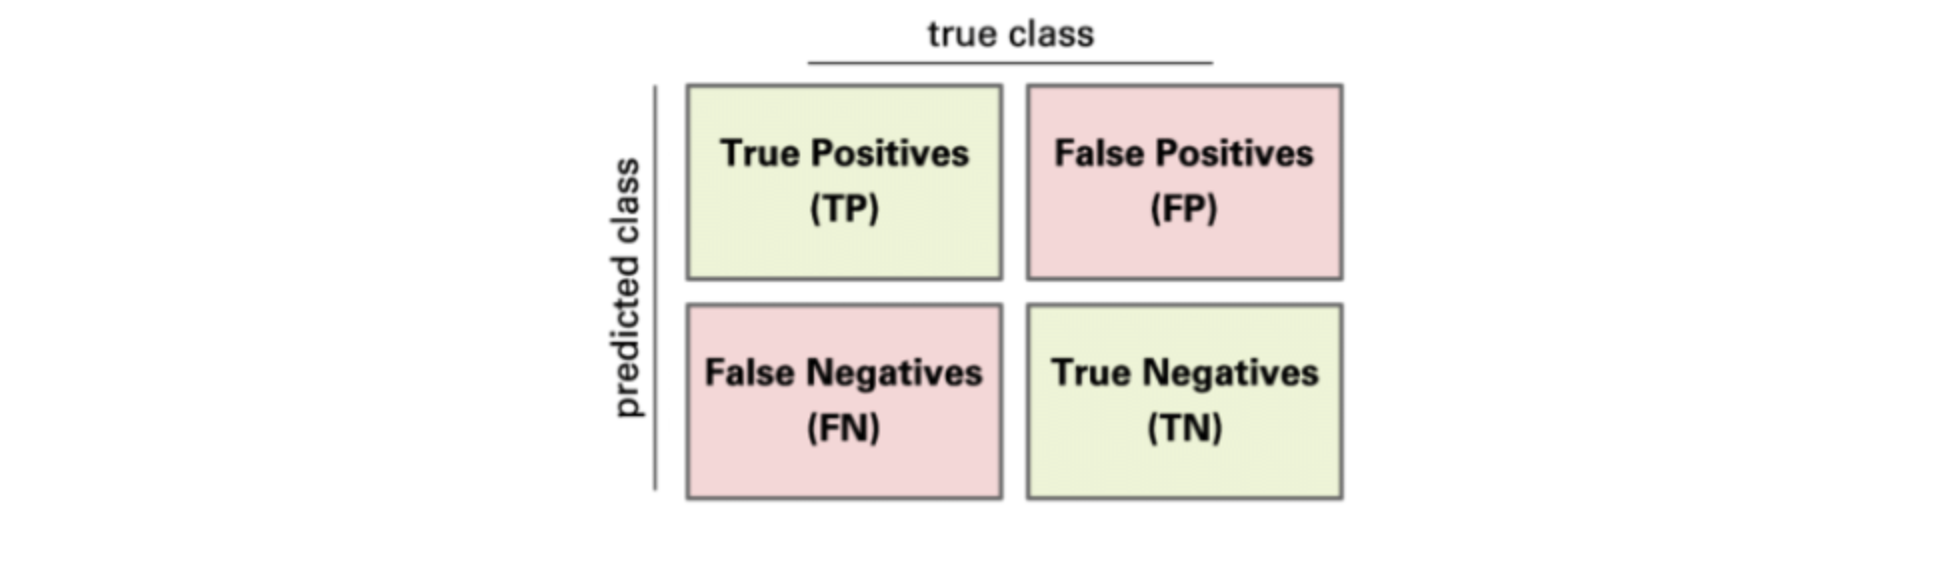

Let's compute the confusion matrix for this KNN model for the laudromat use case.
    

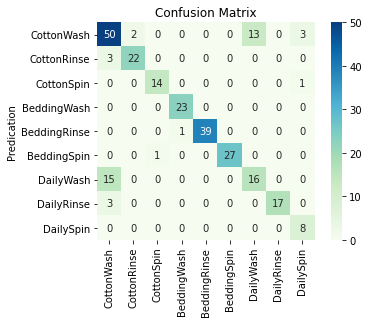

In [6]:
from sklearn.metrics import confusion_matrix

# Determine the accuracy of the model
score = knn.score(X_test_sc, y_test)

# Provide the necessary label 
class_label=['CottonWash', 'CottonRinse', 'CottonSpin', 'BeddingWash', 'BeddingRinse', 'BeddingSpin',
                 'DailyWash', 'DailyRinse','DailySpin']

knn.predict(X_test_sc)
cm = confusion_matrix(y_test, knn.predict(X_test_sc), labels=class_label)
#
axes = sns.heatmap(cm, square=True, annot=True, fmt ='d', cbar=True, cmap=plt.cm.GnBu)
axes.set_ylabel('Actual')
axes.set_ylabel('Predication')
tick_marks = np.arange(len(class_label)) + 0.5
axes.set_xticks(tick_marks)
axes.set_xticklabels(class_label, rotation = 90)
axes.set_yticks(tick_marks)
axes.set_yticklabels(class_label, rotation = 0)
axes.set_title('Confusion Matrix')
plt.show()

What can you conclude from the confusion matrix?

Your response here ...

There are some metrics that we can calculate to make more sense of these numbers above. The following are some of the most important metrics we can get from the quantities observed in the confusion matrix: 

- Accuracy: Proportion of cases correctly identified by the classifier (N represents the total number of observation in the testing dataset):

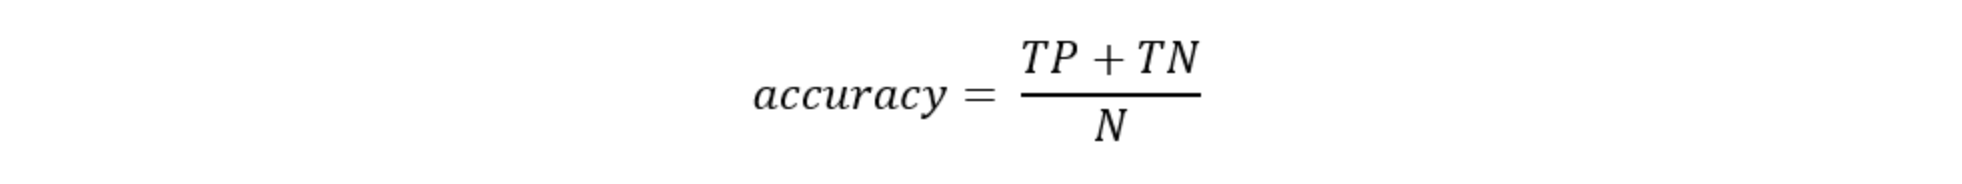

- Precision: Proportion of correct positive predictions. In this problem, this is the proportion of cases when the model is correct when it predicts the mode of the washing machine:

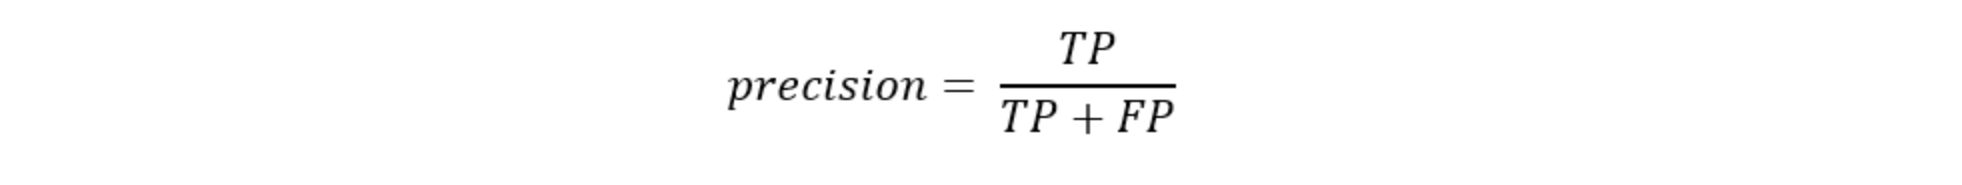


- Recall (or Sensitivity): Proportion of observed positives that were predicted correctly as positives. In this problem, this is the proportion of actual mode that the model can correctly identify: 

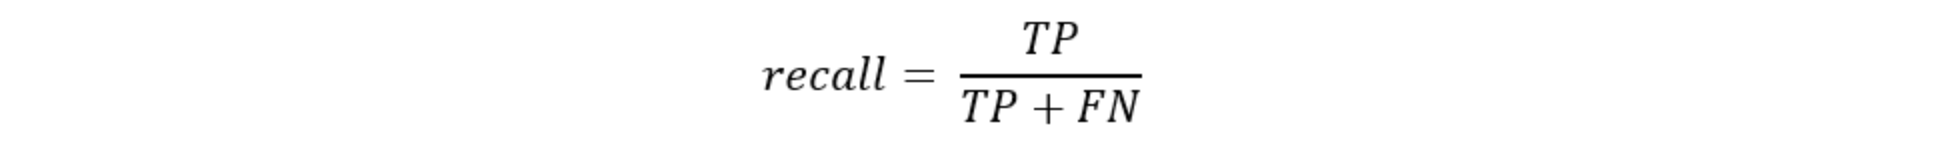


- F1 Score (or Balanced F-score or F-measure): The score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

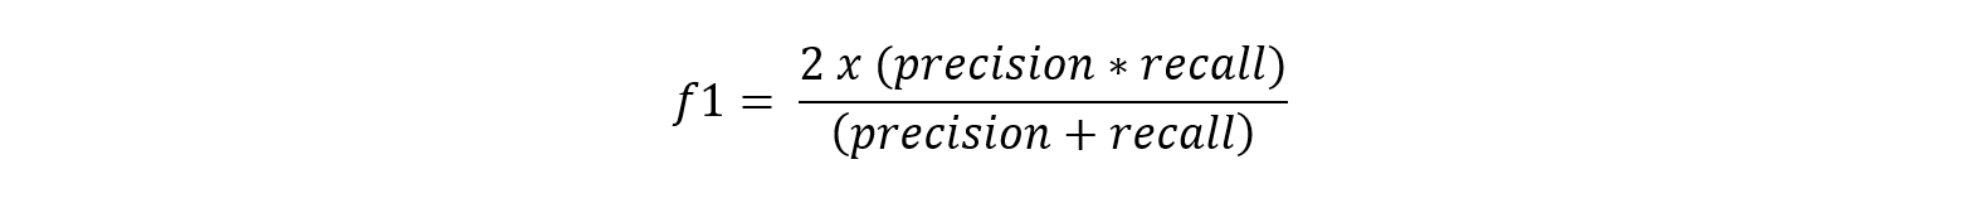


These 4 metrics will help us understand how good is your model. So, let's calculate the accuracy, precision, recall and F1 Score for our KNN model using the test dataset with k=6 as it's hyperparameter.

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

knn = KNeighborsClassifier(n_neighbors=??) 
knn.fit(X_train_sc, y_train)

accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')

print ("Accuracy: {:0.1f}%, Precision: {:0.1f}%, Recall: {:0.1f}%, F1 Score: {:0.1f}%".format(100*accuracy, 100* precision, 100*recall, 100*f1))

Accuracy: 83.7%, Precision: 85.9%, Recall: 87.3%, F1 Score: 86.1%


When the KNN model makes a positive prediction on the mode of the washing machine, it is correct around 86% of the time (precision). This result is not too bad. In addition, the model is also able to identify the mode of the washing machine correctly for 84% of the time. 

What is the reason for using the test dataset to compute your performance matrices? 

Your response here ...

Before we proceed to build the next predictive model, you may save your KNN model for future comparison.

In [9]:
import pickle as pk

model_filename= "./model/knn.mdl"
with open(model_filename, "wb") as file:
    pk.dump(??, file)
print("Model Saved") 

Model Saved




***